<a href="https://colab.research.google.com/github/leburik-1/machine_learning/blob/main/makemore_clone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


file_path = "/content/drive/MyDrive/ml_data/names.txt"


Mounted at /content/drive


In [4]:
words = open(file_path, 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
b = {}
for w in words[:3]:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key= lambda kv: kv[1])

[(('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<S>', 'o'), 1),
 (('o', 'l'), 1),
 (('l', 'i'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1),
 (('i', 'a'), 1),
 (('<S>', 'a'), 1),
 (('a', 'v'), 1),
 (('v', 'a'), 1),
 (('a', '<E>'), 3)]

In [8]:
N = torch.zeros((28,28), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = { s:i+1 for i, s in enumerate(chars) }
stoi['.'] = 0
itos = { i:s for s,i in stoi.items() }

In [49]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

(-0.5, 27.5, 27.5, -0.5)

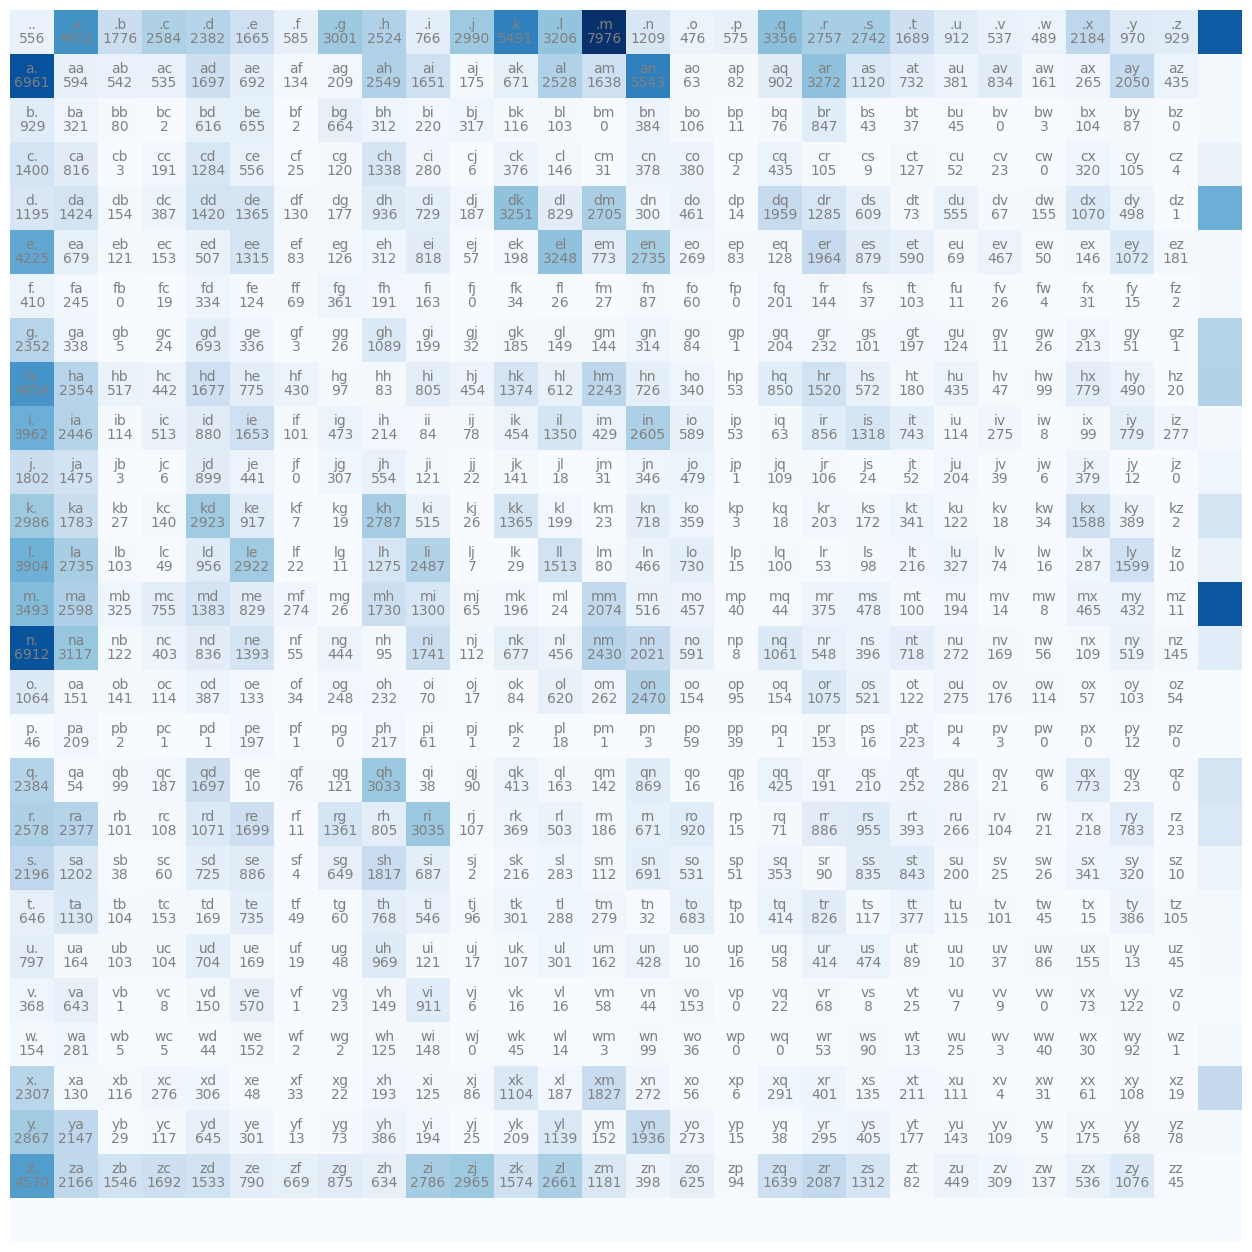

In [41]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j,i,chstr, ha="center", va="bottom", color="gray")
    plt.text(j,i,N[i,j].item(), ha="center", va="top", color="gray")
plt.axis("off")


In [34]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)


In [74]:
g = torch.Generator().manual_seed(2147483647)

for i in range(3):
  out = []
  ix = 0
  while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.


In [76]:
log_likelihood = 0.0

for w in ["kirubel"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')

.k: 0.0924 -2.3811
ki: 0.1006 -2.2963
ir: 0.0479 -3.0377
ru: 0.0199 -3.9182
ub: 0.0329 -3.4149
be: 0.2454 -1.4048
el: 0.1589 -1.8397
l.: 0.0940 -2.3642
log_likelihood=tensor(-20.6569)
nll=tensor(20.6569)


In [18]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [19]:
xs

tensor([ 0,  5, 13, 13,  1])

In [20]:
ys

tensor([ 5, 13, 13,  1,  0])

In [21]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

In [22]:
W = torch.randn((27,27))
xenc @ W

tensor([[-0.8603, -2.5954, -1.6909,  0.2941, -0.4387, -1.2092, -0.9511,  0.1779,
          0.1449,  0.4172, -0.6976, -1.7535, -1.2686,  0.0221, -0.0842, -0.9397,
          0.3846,  1.4788, -0.0523,  0.4929,  0.0404, -0.0810, -1.5621, -0.5590,
         -0.5469, -0.4745, -0.5282],
        [ 0.3579, -1.8306,  0.0312, -0.3186,  0.0172, -0.7570,  2.7990,  0.8052,
          2.2617,  0.2809,  0.2663, -0.4729,  1.5345,  1.3146, -0.8937,  1.7131,
         -0.3953,  0.7410,  1.4404, -0.1327, -0.4523, -1.6320, -0.6493,  0.3576,
         -1.3623, -0.2019, -0.1958],
        [ 1.8444,  0.8237,  0.3136,  0.1876,  0.4859,  0.7017, -0.3557, -0.1760,
         -1.4488, -0.3397,  0.0832, -0.4599, -0.9545, -0.5313, -0.7848,  0.3561,
         -1.0005,  0.1594,  0.2407,  2.0176,  1.5150,  0.4354, -0.8606, -0.4341,
         -0.3285,  0.7389, -0.1603],
        [ 1.8444,  0.8237,  0.3136,  0.1876,  0.4859,  0.7017, -0.3557, -0.1760,
         -1.4488, -0.3397,  0.0832, -0.4599, -0.9545, -0.5313, -0.7848,  0.3561

In [23]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0180, 0.0032, 0.0078, 0.0571, 0.0275, 0.0127, 0.0164, 0.0509, 0.0492,
         0.0646, 0.0212, 0.0074, 0.0120, 0.0435, 0.0391, 0.0166, 0.0626, 0.1868,
         0.0404, 0.0697, 0.0443, 0.0393, 0.0089, 0.0243, 0.0246, 0.0265, 0.0251],
        [0.0226, 0.0025, 0.0163, 0.0115, 0.0161, 0.0074, 0.2599, 0.0354, 0.1518,
         0.0209, 0.0206, 0.0099, 0.0734, 0.0589, 0.0065, 0.0877, 0.0107, 0.0332,
         0.0668, 0.0139, 0.0101, 0.0031, 0.0083, 0.0226, 0.0041, 0.0129, 0.0130],
        [0.1469, 0.0529, 0.0318, 0.0280, 0.0378, 0.0469, 0.0163, 0.0195, 0.0055,
         0.0165, 0.0252, 0.0147, 0.0089, 0.0137, 0.0106, 0.0332, 0.0085, 0.0272,
         0.0296, 0.1747, 0.1057, 0.0359, 0.0098, 0.0151, 0.0167, 0.0486, 0.0198],
        [0.1469, 0.0529, 0.0318, 0.0280, 0.0378, 0.0469, 0.0163, 0.0195, 0.0055,
         0.0165, 0.0252, 0.0147, 0.0089, 0.0137, 0.0106, 0.0332, 0.0085, 0.0272,
         0.0296, 0.1747, 0.1057, 0.0359, 0.0098, 0.0151, 0.0167, 0.0486, 0.0198],
        [0.0094, 0.0152,

In [24]:
probs[0]

tensor([0.0180, 0.0032, 0.0078, 0.0571, 0.0275, 0.0127, 0.0164, 0.0509, 0.0492,
        0.0646, 0.0212, 0.0074, 0.0120, 0.0435, 0.0391, 0.0166, 0.0626, 0.1868,
        0.0404, 0.0697, 0.0443, 0.0393, 0.0089, 0.0243, 0.0246, 0.0265, 0.0251])

In [25]:
nlls = torch.zeros(5)

for i in range(5):
  x = xs[i].item()
  y = ys[i].item()

  print('------------------------')
  print(f'biagram example {i+1}: {itos[x]}{itos[y]}  (indexes {x}{y})')
  print('input to the neural net: ', x)
  print('label (actual next character):', y)
  p = probs[i, y]
  print('Probability assigned by the net to the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:',logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print("============")
print("Average negative log likelihood, i.e loss =", nlls.mean().item())


------------------------
biagram example 1: .e  (indexes 05)
input to the neural net:  0
label (actual next character): 5
Probability assigned by the net to the correct character: 0.012707502581179142
log likelihood: -4.365562915802002
negative log likelihood: 4.365562915802002
------------------------
biagram example 2: em  (indexes 513)
input to the neural net:  5
label (actual next character): 13
Probability assigned by the net to the correct character: 0.0588923804461956
log likelihood: -2.8320436477661133
negative log likelihood: 2.8320436477661133
------------------------
biagram example 3: mm  (indexes 1313)
input to the neural net:  13
label (actual next character): 13
Probability assigned by the net to the correct character: 0.013656238093972206
log likelihood: -4.2935590744018555
negative log likelihood: 4.2935590744018555
------------------------
biagram example 4: ma  (indexes 131)
input to the neural net:  13
label (actual next character): 1
Probability assigned by the net

In [26]:
xs

tensor([ 0,  5, 13, 13,  1])

In [27]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [30]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for the next character  (softmax function)

In [31]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[:1]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)


number of examples:  32033


In [32]:
# gradient descent
for k in range(100):
   # forward pass
   xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
   logits = xenc @ W # predict log-counts
   counts = logits.exp() # counts equivalent to N
   probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
   loss = -probs[torch.arange(num), ys].log().mean()
   print(loss.item())

   # backward pass
   W.grad = None # set to zero the gradient
   loss.backward()

   # update
   W.data += -0.1 * W.grad

2.8022682666778564
2.703054904937744
2.6053378582000732
2.5092175006866455
2.414794921875
2.3221702575683594
2.2314493656158447
2.1427340507507324
2.0561234951019287
1.971713900566101
1.8895968198776245
1.8098562955856323
1.7325690984725952
1.6578022241592407
1.5856077671051025
1.5160315036773682
1.449102520942688
1.3848375082015991
1.323238492012024
1.2642958164215088
1.207985758781433
1.1542723178863525
1.1031073331832886
1.0544328689575195
1.0081816911697388
0.9642793536186218
0.9226456880569458
0.8831930160522461
0.8458338379859924
0.8104745149612427
0.7770232558250427
0.745386004447937
0.7154713869094849
0.6871874332427979
0.6604462265968323
0.6351617574691772
0.6112505197525024
0.5886325240135193
0.5672321319580078
0.5469765067100525
0.5277966856956482
0.5096278190612793
0.4924074411392212
0.4760780930519104
0.4605860114097595
0.44587892293930054
0.4319090247154236
0.4186316430568695
0.4060039818286896
0.39398810267448425
0.3825458884239197
0.3716432452201843
0.3612484335899353
0

In [37]:
# finally, sample the neural net model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:
    p = P[ix]

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
print(' '.joint(out))

KeyError: 27